In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as df
import xarray as xr
import netCDF4 as nc
import os
import requests
from datetime import timedelta
import tensorflow as tf
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
# Get IBTrACS
import xarray as xr
import netCDF4 as nc

In [44]:
# Region: 20 west to 100 west, 10 north to 40 noth
ibtracs = pd.read_csv("../Data/TC Count/IBTrACS/ibtracs.NA.list.v04r00.csv")
ibtracs_unitDrop = ibtracs.iloc[1:]
ibtracs_unitDrop['LON'] = pd.to_numeric(ibtracs_unitDrop['LON'])
ibtracs_unitDrop['LAT'] = pd.to_numeric(ibtracs_unitDrop['LAT'])
ibtracs_NA = ibtracs_unitDrop.loc[(ibtracs_unitDrop['LON'] <= -20) & (ibtracs_unitDrop['LON'] >= -100) & (ibtracs_unitDrop['LAT'] >= 10) & (ibtracs_unitDrop['LAT'] <=40 )]
ibtracs_NA['SEASON'] = pd.to_numeric(ibtracs_NA['SEASON'])
ibtracs_NA['ISO_TIME'] = pd.to_datetime(ibtracs_NA['ISO_TIME'])
ibtracs_NA['NUMBER'] = pd.to_numeric(ibtracs_NA['NUMBER'])
ibtracs_NA_recent = ibtracs_NA[['SID','SEASON','LAT','LON','NUMBER','ISO_TIME','USA_SSHS']]
ibtracs_NA_recent = ibtracs_NA_recent.loc[ibtracs_NA_recent['SEASON'] >= 1980]
ibtracs_NA_recent['Month'] = ibtracs_NA_recent['ISO_TIME'].dt.month

In [45]:
sample = ibtracs_NA_recent.loc[(ibtracs_NA_recent['USA_SSHS'] >= 0) & (ibtracs_NA_recent['LAT'].between(10,13)) & (ibtracs_NA_recent['LON'].between(-50,-40))].groupby('SEASON').first().reset_index()

In [60]:
ibtracs_NA_final = ibtracs_NA_recent.groupby('SID').first().reset_index().groupby('SEASON').count().reset_index()[['SEASON','SID']]
ibtracs_NA_final['COUNT'] = ibtracs_NA_final['SID']
ibtracs_NA_final = ibtracs_NA_final.drop('SID',axis = 1,)

In [74]:
ibtracs_NA_final.to_csv("../Data/TC Count/IBTrACS/IBTrACS(1980-P, 100W-20W&10N-40N).csv",index = False)

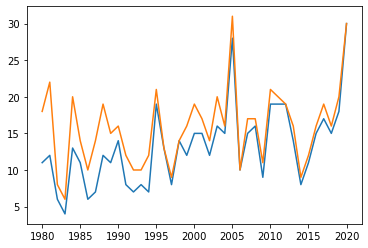

In [66]:
# VK08 COUNT
# get TC count
df_VK08_TCCount = pd.read_table('../Data/TC Count/VK08_TCCounts_1878-2020.dat', sep="\s+", header=None)
df_VK08_TCCount = df_VK08_TCCount.rename(columns={0: "Year", 1:"VK08_TCCount"}).copy()
df_VK08_TCCount = df_VK08_TCCount.loc[df_VK08_TCCount['Year'] >= 1980]
plt.plot(df_VK08_TCCount['Year'],df_VK08_TCCount['VK08_TCCount'])
plt.plot(ibtracs_NA_final['SEASON'][:-2],ibtracs_NA_final['COUNT'][:-2])